<center><h1 style="color: pink"> Airbnb Mini Project </h1>


In [150]:
import pandas as pd
import matplotlib.pyplot as plt 

In [153]:
airbnb=pd.read_csv('airbnb_2.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,5/07/2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0


<b> 1. Count of how many airbnb listings are in each of the 5 Neighbourhood Groups (Manhattan, Brooklyn, Queens, Bronx, Staten Island) and identify which Neighbourhood Groups has the largest number of Airbnb Listings </b>

We want to focus our attention on the Neighbourhood Groups that have the top 3 number of Airbnb Listings.

In [156]:
count_airbnb_listings=airbnb['neighbourhood_group'].value_counts()
print(count_airbnb_listings)

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


Turn the count into a percent 

In [255]:
perc_count_airbnb_listings=airbnb['neighbourhood_group'].value_counts(normalize=True)
perc_count_airbnb_listings.head()


neighbourhood_group
Manhattan        0.443011
Brooklyn         0.411167
Queens           0.115881
Bronx            0.022313
Staten Island    0.007629
Name: proportion, dtype: float64

A new calculated field called 'Revenue' which is to be calculated by using the Price Column x Number_Of_Reviews Columns </b>

In [162]:
airbnb['revenue']= airbnb['price']*airbnb['number_of_reviews']
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,revenue
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19/10/2018,0.21,6,365,1341
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21/05/2019,0.38,2,355,10125
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365,0
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,5/07/2019,4.64,1,194,24030
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19/11/2018,0.10,1,0,720


A Bar Plot that shows which Neighbourhood Group has the highest average revenues.

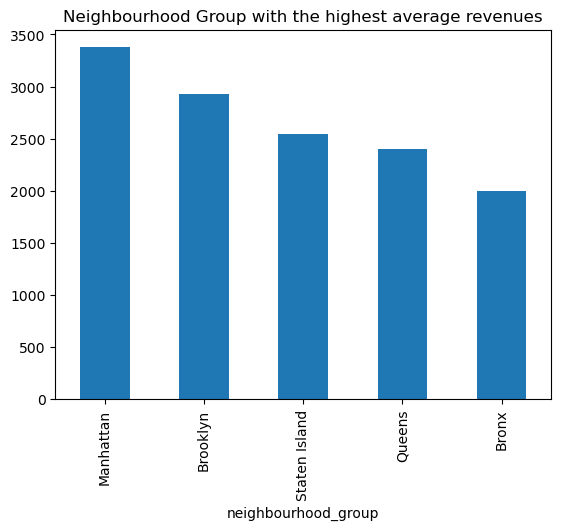

In [165]:
ng_highest_avg_revenue= airbnb.groupby('neighbourhood_group')['revenue'].mean().sort_values(ascending=False)
ng_highest_avg_revenue.plot(kind='bar')
plt.xlabel('neighbourhood_group')
plt.title('Neighbourhood Group with the highest average revenues')
plt.show()

1.Filter the Airbnb Dataframe to include only the Neighbourhood Groups `Manhattan`, `Brooklyn` and `Queens`. 
    
2.Identify the top 3 Revenue Generating Neighborhoods within each of the three Neighbourhood_Groups.


In [231]:
mbq=airbnb[airbnb['neighbourhood_group'].isin(['Manhattan', 'Brooklyn', 'Queens'])]
mbq.head()
top_3_generating_neighbourhoods=mbq.groupby(['neighbourhood_group', 'neighbourhood']).sum(numeric_only=True)['revenue'].sort_values(ascending=False).reset_index()
top_3_rev=top_3_generating_neighbourhoods.groupby('neighbourhood_group').head(3).sort_values(by='neighbourhood_group')
top_3_rev

,neighbourhood_group,neighbourhood,revenue
0,Brooklyn,Williamsburg,12389011
1,Brooklyn,Bedford-Stuyvesant,12352457
8,Brooklyn,Bushwick,4762224
2,Manhattan,Harlem,8598692
3,Manhattan,Hell's Kitchen,8238991
4,Manhattan,East Village,7574535
17,Queens,Astoria,1880840
28,Queens,Long Island City,1374945
33,Queens,Flushing,1140450


1.Building on the previous question where I identified the top 3 Neighbourhoods within each of the three neighbourhood_groups based off Revenues, let's filter the Airbnb Dataframe to include only these neighbourhoods. 
    
2.Identify the top average revenue generating room type for each of the nine neighbourhoods and plot this out in a Bar Chart.</b>
    

      id                                 name  host_id      host_name  \
2   3647  THE VILLAGE OF HARLEM....NEW YORK !     4632      Elisabeth   
6   5121                      BlissArtsSpace!     7356          Garon   
7   5178     Large Furnished Room Near B'way      8967       Shunichi   
11  5441      Central Manhattan/near Broadway     7989           Kate   
15  6848     Only 2 stops to Manhattan studio    15991  Allen & Irina   

   neighbourhood_group       neighbourhood  latitude  longitude  \
2            Manhattan              Harlem  40.80902  -73.94190   
6             Brooklyn  Bedford-Stuyvesant  40.68688  -73.95596   
7            Manhattan      Hell's Kitchen  40.76489  -73.98493   
11           Manhattan      Hell's Kitchen  40.76076  -73.98867   
15            Brooklyn        Williamsburg  40.70837  -73.95352   

          room_type  price  minimum_nights  number_of_reviews last_review  \
2      Private room    150               3                  0         NaN   
6   

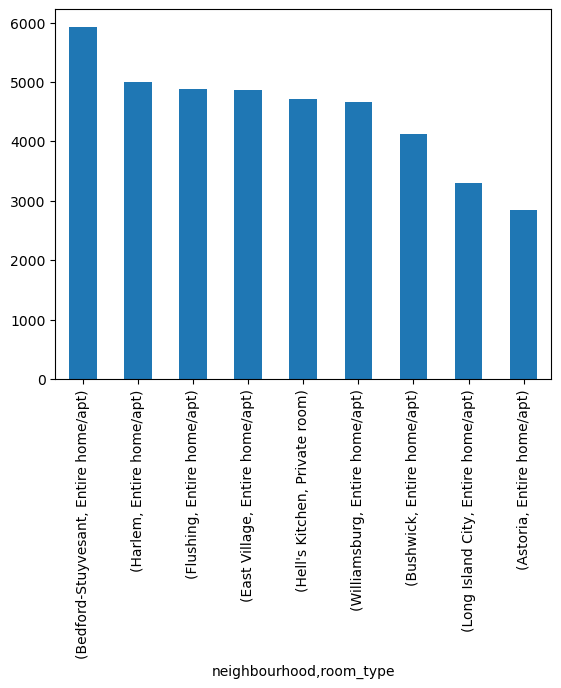

In [267]:
top_neighbourhoods=airbnb[airbnb['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant', 'Bushwick', 'Harlem', "Hell's Kitchen", 'East Village', 'Astoria', 'Long Island City', 'Flushing'])]
print(top_neighbourhoods.head())
top_rev_rt=top_neighbourhoods.groupby(['neighbourhood', 'room_type'])['revenue'].mean().sort_values(ascending=False)
top_1_rt=top_rev_rt.groupby('neighbourhood').head(1)
top_1_rt
top_1_rt.plot(kind='bar')

plt.show()